### PART 1

1. Create a line plot comparing total population over time:
   - Choose 5 countries
   - Calculate the total population by country for each year
   - Create a line plot showing population trends
   - Include a legend identifying each country
   - Add appropriate axis labels and title
   - Use different line styles or colors to distinguish the countries

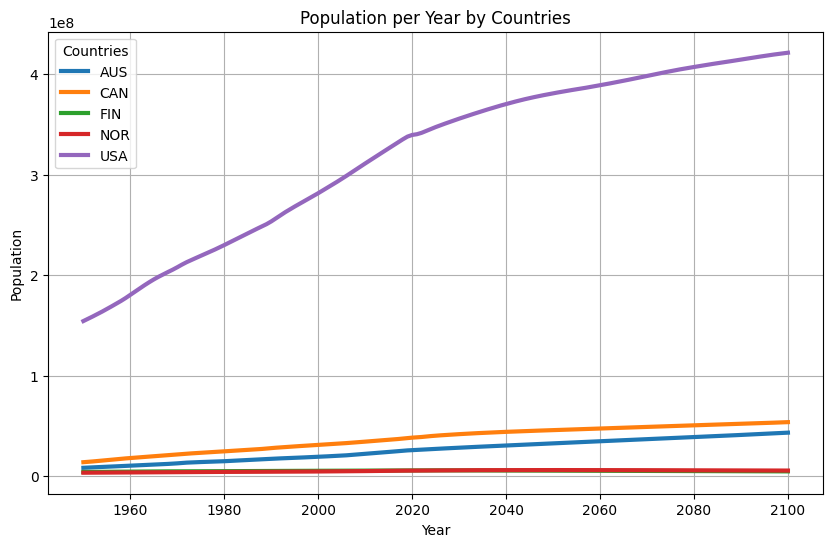

In [4]:
#Importing necessary libraries: 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Choosing 5 countries: 

data = {}
data['AUS'] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-aus--age--gender--year.csv")
data['CAN'] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-can--age--gender--year.csv")
data['FIN'] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-fin--age--gender--year.csv")
data['NOR'] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-nor--age--gender--year.csv")
data['USA'] = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv")

#Calculating population by year:

pop_by_year = pd.DataFrame()
for countries in data: 
    x = data[countries].groupby('year')['population'].sum()
    pop_by_year[countries] = x

#Creating line plot 

plt.figure(figsize=(10, 6))

for countries in pop_by_year.columns:
    plt.plot(pop_by_year.index, pop_by_year[countries], linestyle='-', linewidth=3, label=countries)

plt.legend(title="Countries")
plt.title("Population per Year by Countries")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()

2. Investigate demographic shifts using a stacked bar chart:
   - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
   - Create a stacked bar chart showing these changes
   - Calculate and display the percentage for each age group
   - Add text annotations showing key percentages
   - Include clear labels and a legend

/var/folders/sp/8spqkbd52t91vd__pkq4vgvw0000gq/T/ipykernel_24523/2163227762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_by_year['age_group'] = pd.cut(USA_by_year['age'], bins=age_bins, labels=age_cat, right=True)
/var/folders/sp/8spqkbd52t91vd__pkq4vgvw0000gq/T/ipykernel_24523/2163227762.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = USA_by_year.groupby(['year', 'age_group'])['population'].sum().reset_index(name='population_count')


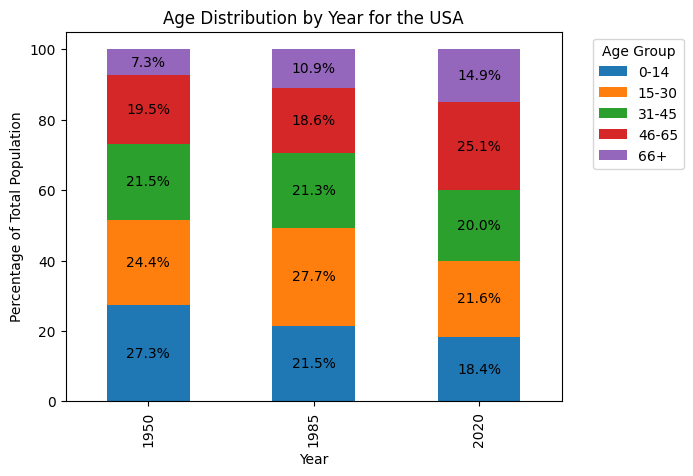

In [120]:
#Creating a dataframe grouping by year and age distribution 

    #filtering USA data by 1950, 1985, and 2020 
USA = data['USA']
USA_by_year = USA[USA['year'].isin([1950, 1985, 2020])]

    #defining bins labels for age category to create a new "age_group" column
age_bins = [-1, 14, 30, 45, 65, 100] 
age_cat = ['0-14', '15-30', '31-45', '46-65', '66+']
USA_by_year['age_group'] = pd.cut(USA_by_year['age'], bins=age_bins, labels=age_cat, right=True) 

#Calculating percentage of age groups 
age_distribution = USA_by_year.groupby(['year', 'age_group'])['population'].sum().reset_index(name='population_count')
age_distribution['total_population'] = age_distribution.groupby('year')['population_count'].transform('sum')
age_distribution['percent'] = (age_distribution['population_count'] / age_distribution['total_population']) * 100

#Creating stacked bar chart 

    #reshaping dataframe 

barchart_dt = age_distribution.pivot(index='year', columns='age_group', values='percent')
    
    #plotting barchart 

barchart_dt.plot(kind='bar', stacked=True)
plt.title('Age Distribution by Year for the USA')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
for i in range(len(barchart_dt)):
    height = barchart_dt.iloc[i].cumsum()
    for age_group in barchart_dt.columns:
        percent = barchart_dt.iloc[i][age_group]
        plt.text(i, height[age_group] - percent / 2, f'{percent:.1f}%', ha='center', va='center')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.05, 1))

### PART 2

1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.
   - Use seaborn's heatmap function
   - Add clear annotations and labels
   - Write a brief explanation of what the heatmap reveals about the population structure

/var/folders/sp/8spqkbd52t91vd__pkq4vgvw0000gq/T/ipykernel_64349/3757687341.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1950['age_group'] = pd.cut(df_1950['age'], bins=age_bins, labels=age_cat, right=True)
/var/folders/sp/8spqkbd52t91vd__pkq4vgvw0000gq/T/ipykernel_64349/3757687341.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_1950 = df_1950.groupby(['country', 'age_group'])['population'].sum().reset_index()


<Axes: title={'center': 'Heatmap of Population Distribution in 1950 by Countries'}, xlabel='age_group', ylabel='country'>

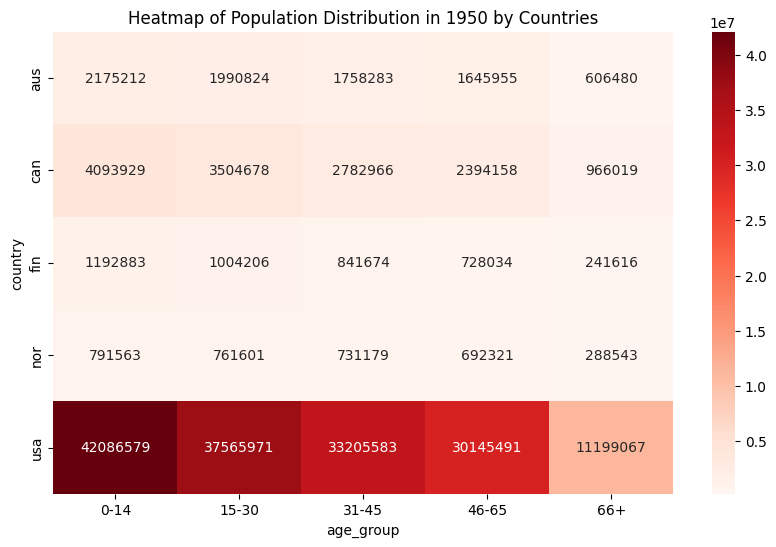

In [6]:
#Combining 5 countries into one dataframe 

df = pd.concat([data['AUS'], data['USA'], data['NOR'], data['CAN'], data['FIN']])

#Seperating by year and adding age labels 

    #Separating by year 
df_1950 = df[df['year'].isin([1950])]

    #Adding age labels
age_bins = [-1, 14, 30, 45, 65, 100] 
age_cat = ['0-14', '15-30', '31-45', '46-65', '66+']
df_1950['age_group'] = pd.cut(df_1950['age'], bins=age_bins, labels=age_cat, right=True) 

#Creating data for heatmap 

heatmap_1950 = df_1950.groupby(['country', 'age_group'])['population'].sum().reset_index()
heatmap_1950 = heatmap_1950.pivot(index='country', columns='age_group', values='population')

#Plotting heatmap 
plt.figure(figsize=(10, 6))
plt.title('Heatmap of Population Distribution in 1950 by Countries')
plt.xlabel('Age Groups')
plt.ylabel('Countries')
sns.heatmap(heatmap_1950, annot=True, cmap='Reds', fmt='d')

A heatmap utilizes color to display relationship between groups. From this heatmap, we see that in the 1950, the largest population group among the 5 countries was the 0-14 age group in the USA. USA takes the lead out of the 5 countries in the largest population, across all age groups as displayed by the color scheme. Canada has the second leading population across all age groups, followed by Australia, Finland, and Norway. 

2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
   - Create side-by-side violin plots using seaborn
   - Add clear labels and a title
   - Write a brief comparison of what the plots reveal

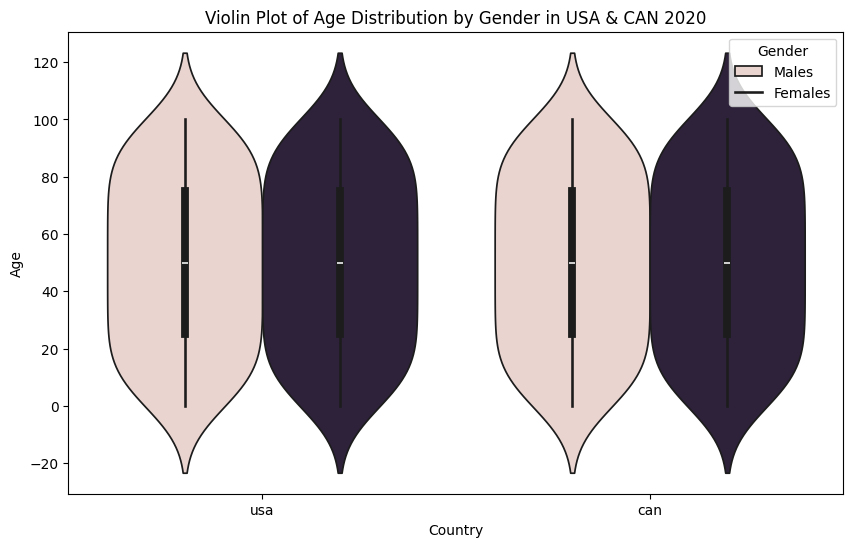

In [7]:
#Choosing two countries: USA and Canada

USA_CAN = pd.concat([data['USA'], data['CAN']])

#Filtering data by 202 

USA_CAN_2020 = USA_CAN[USA_CAN['year'].isin([2020])]

#Plotting violin plot 

plt.figure(figsize=(10, 6))
plt.title('Violin Plot of Age Distribution by Gender in USA & CAN 2020')
plt.xlabel('Country')
plt.ylabel('Age')
sns.violinplot(x='country', y='age', hue='gender', data=USA_CAN_2020)
plt.legend(title='Gender', labels=['Males', 'Females'])

A violin plot is a way to represent the distribution of numerical data through density curves. This graph shows us the distribution in age between gender for the USA and Canada in 2020. Based on the graph, we see that both countries have a pretty symmetric distribution , indicating that there is not much of a difference. 

3. Create a pairplot comparing population metrics across four countries:
   - Select four countries of your choice
   - Include all variables in the dataset
   - Use the country as the hue parameter to distinguish between countries
   - Write a brief summary of any patterns or relationships revealed by the pairplot

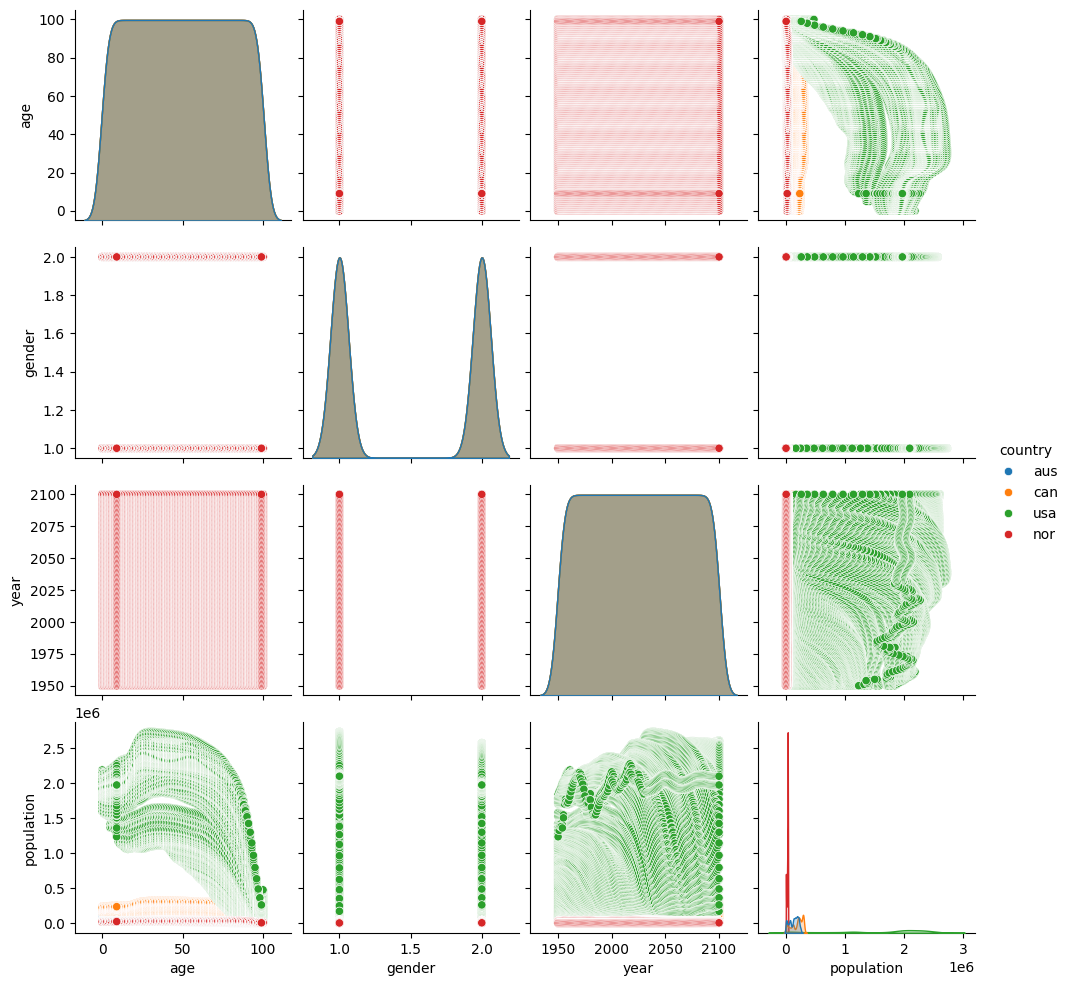

In [9]:
#Creating dataframe with 4 countries 

four_countries = pd.concat([data['AUS'], data['CAN'],data['USA'], data['NOR']])

#Plotting pairplot 
sns.pairplot(data=four_countries, hue='country')

The purpose of a pairplot is to provide a way to visualize the relationship between variables in a given dataset. For this example, I have plotted data from 4 countries (USA, Canada, Norway, and Australia) and the variables age, gender, year, and population. One interesting thing to note from this pairplot is that the relationship between age and population size for the USA is quite variable compared to the other countries. The USA has a much larger population and is increasing throughout the years, compared to the other countries. 